### Fase 2: Visualización 

In [89]:
# Importamos las librerías que necesitamos
# 
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest


# Configuraciones
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Cargamos los datos.

In [90]:
df_CFA = pd.read_csv('datos_limpios_CFA.csv', index_col=0)

In [91]:
df_CFA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Points Accumulate            403760 non-null  int64  
 11  id_year_month                403760 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 40.0+ MB


In [92]:
df_CFA['Points Accumulated'] = df_CFA['Points Accumulated'].astype('int')

In [93]:
df_CFA['Loyalty Number'] = df_CFA['Loyalty Number'].astype('object')

In [94]:
df_CLH = pd.read_csv('datos_limpios_CLH.csv', index_col=0)

In [95]:
df = pd.read_csv('datos_aerolinea.csv', index_col=0)

Usando las herramientas de visualización que has aprendido durante este módulo, 
contesta a las siguientes preguntas usando el tipo de gráfica que consideres más 
adecuado (podéis ponerle fantasía a las gráficas ;-) ): 

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 

In [96]:
df_vuelos_mes = df.groupby("Month")["Flights Booked"].sum().reset_index()
df_vuelos_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


<BarContainer object of 12 artists>

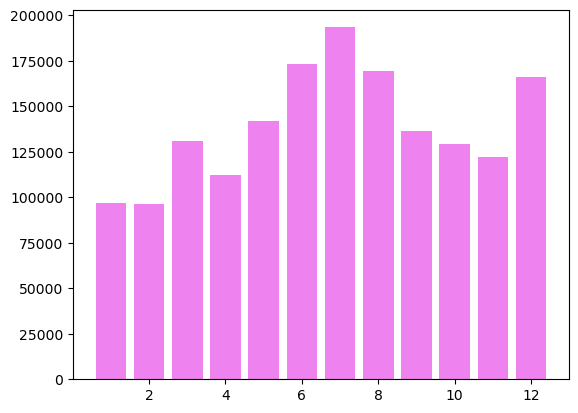

In [97]:
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "Month", 
            height=  "Flights Booked", 
            data = df_vuelos_mes, 
            color = "violet")

''

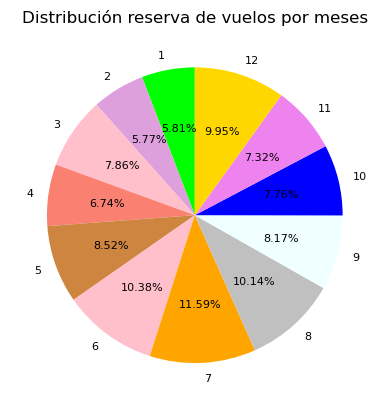

In [98]:
colores = ["lime", "plum", "pink", "salmon", "peru", "pink", "orange", 'silver', 'azure', 'blue', 'violet', 'gold']

plt.pie("Flights Booked", labels= "Month",
        data = df_vuelos_mes, 
        autopct=  '%1.2f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title("Distribución reserva de vuelos por meses")
;

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por 
los clientes?

Esto es una comparación entre variables numéricas. Podemos usar un gráfico de regresión.

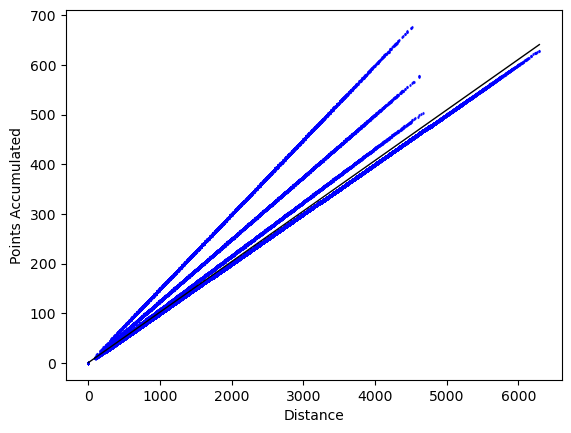

In [104]:
sns.regplot(x='Distance',
            y='Points Accumulated', 
            data=df,
            marker='d',
            color='red',            
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "blue", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            );


Vemos que hay una fuerte relación positiva entre distancia volada y puntos acumulados. 

3. ¿Cuál es la distribución de los clientes por provincia o estado? 

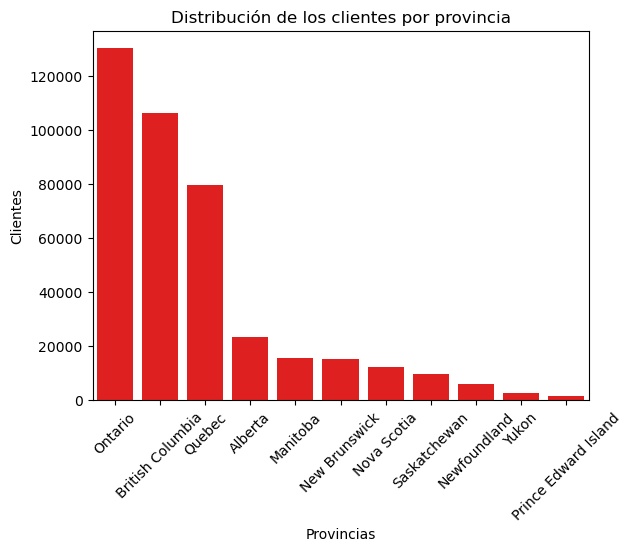

In [38]:
# Configurar la paleta
sns.set_palette("inferno")  # Usar la paleta inferno

sns.countplot(x = "Province", 
              data = df, 
              color = "r",
              order=df['Province'].value_counts().index)

# Giramos las etiquetas de las provincias.  
plt.xticks(rotation = 45);

# Cambiamos el nombre de los ejes 
plt.xlabel("Provincias")
plt.ylabel("Clientes")
plt.title("Distribución de los clientes por provincia"); 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de 
los clientes? 

In [42]:
df_salario_promedio_por_educacion = df.groupby("Education")["Salary"].mean().reset_index()
df_salario_promedio_por_educacion

,Education,Salary
0,Bachelor,72599.080913
1,College,79371.732902
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [ ]:
sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_salario_promedio_por_educacion, 
            palette = "magma")


plt.title("Salario promedio por nivel de educación")
plt.xlabel="Educación"
plt.ylabel="Salario"
# Giramos las etiquetas del eje x
plt.xticks(rotation = 45);

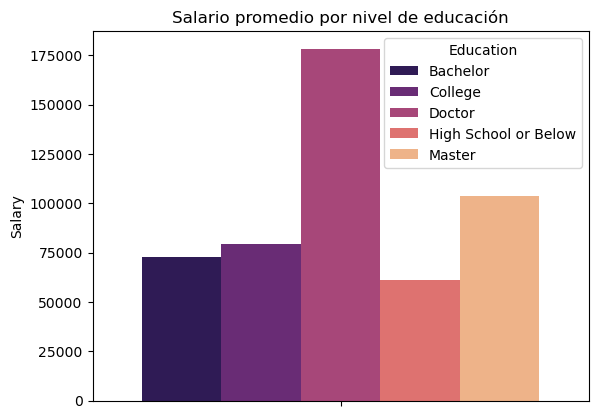

In [51]:
sns.barplot(hue = "Education", 
            y = "Salary", 
            data = df_salario_promedio_por_educacion, 
            palette = "magma")


plt.title("Salario promedio por nivel de educación")
plt.xlabel="Educación"
plt.ylabel="Salario"
# Giramos las etiquetas del eje x
plt.xticks(rotation = 45);

''

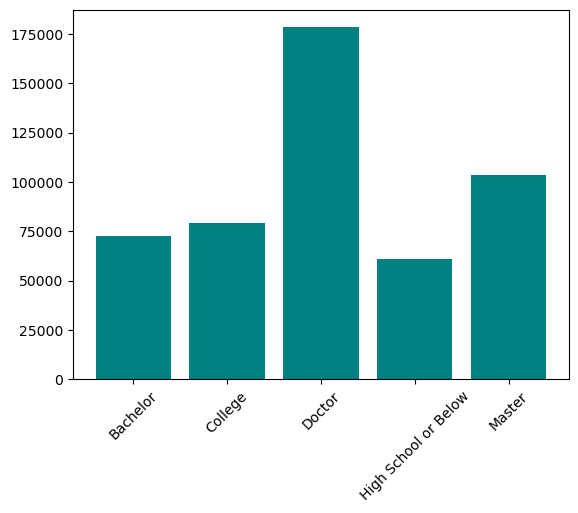

In [49]:
# Lo mismo, pero usando Matplotlib
plt.bar(x = "Education", 
            height=  "Salary", 
            data = df_salario_promedio_por_educacion,
            color = "teal")


# Giramos las etiquetas del eje x
plt.xticks(rotation = 45)
;

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

In [52]:
df.sample()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Points Accumulate,id_year_month,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
212138,566714,2017,3,16,3,19,3021,302.0,0,0,302,566714_3_2017,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,82545.0,Single,Star,2379.83,Standard,2013,5,2018.0,9.0


In [55]:
df["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

colores = ["lime", "plum", "pink", "salmon", "peru", "pink", "orange", 'silver', 'azure', 'blue', 'violet', 'gold']

In [59]:
df_clientes_por_fidelidad = df.groupby("Enrollment Type")["Loyalty Number"].count().reset_index()

''

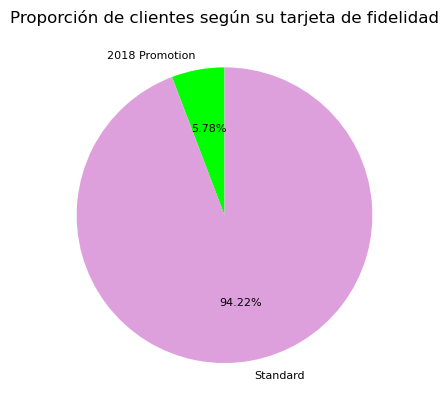

In [62]:
colores = ["lime", 'plum']

plt.pie("Loyalty Number", labels= "Enrollment Type",
        data = df_clientes_por_fidelidad, 
        autopct=  '%1.2f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title("Proporción de clientes según su tarjeta de fidelidad")
;

In [63]:
df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Points Accumulate', 'id_year_month', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

6. ¿Cómo se distribuyen los clientes según su estado civil y género? 

In [ ]:
# Para los cálculos con matplot

df_estado_civil = df.groupby("Marital Status")["Loyalty Number"].count().reset_index()
df_genero = df.groupby("Gender")["Loyalty Number"].count().reset_index()

<BarContainer object of 3 artists>

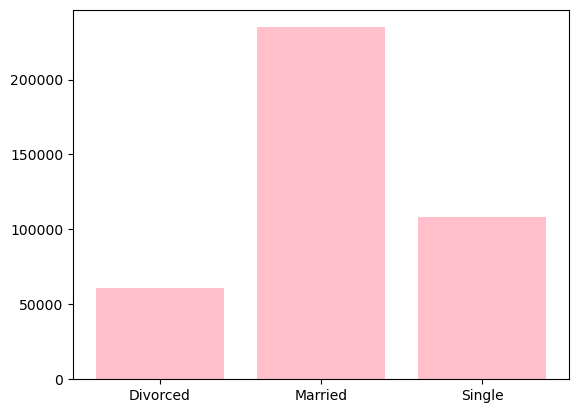

In [68]:
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "Marital Status", 
            height=  "Loyalty Number", 
            data = df_estado_civil, 
            color = "pink")

In [ ]:
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "Marital Status", 
            height=  "Loyalty Number", 
            data = df_estado_civil, 
            color = "pink")

<BarContainer object of 2 artists>

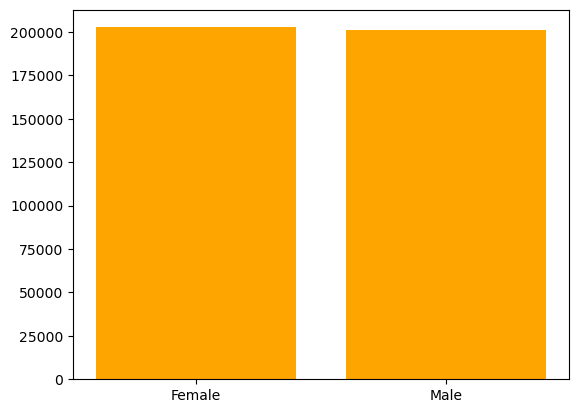

In [74]:
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "Gender", 
            height=  "Loyalty Number", 
            data = df_genero, 
            color = "orange")

In [73]:
# Comprobamos si efectivamdente es tan simétrica la proporción 
 
df['Gender'].value_counts()

Gender
Female    202757
Male      201003
Name: count, dtype: int64